In [1]:
import pandas as pd # for data processing and exploration
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import scipy
import json # load in data from scraper

In [2]:
with open('nba_player_stats.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.dtypes

RK        object
PLAYER    object
GP        object
MPG       object
TS%       object
AST       object
TO        object
USG       object
ORR       object
DRR       object
REBR      object
PER       object
VA        object
EWA       object
dtype: object

In [3]:
df[['GP','MPG','TS%','AST','TO','USG','ORR','DRR','REBR','PER','VA','EWA']] = df[['GP','MPG','TS%','AST','TO','USG','ORR',
                                                                                  'DRR','REBR','PER','VA','EWA']].apply(pd.to_numeric)
df.drop(['RK','PLAYER'], axis=1, inplace=True)

#### Convert the columns to numeric values, in this case mostly floats, and drop the 'RK' and 'PLAYER' columns as they are not needed.

In [4]:
print(df.dtypes)
df.head()

GP        int64
MPG     float64
TS%     float64
AST     float64
TO      float64
USG     float64
ORR     float64
DRR     float64
REBR    float64
PER     float64
VA      float64
EWA     float64
dtype: object


,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8


In [5]:
df.describe()

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
count,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.00000,6115.000000,6115.000000
mean,65.404906,24.466214,0.534835,16.139052,10.986656,18.200998,5.283238,14.728324,10.004677,14.29972,99.341635,3.312412
std,14.148873,7.839895,0.049002,7.939031,2.841155,4.836675,3.829322,5.872838,4.543605,4.30648,138.126919,4.604463
min,17.000000,7.000000,0.338000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-208.700000,-7.000000
25%,56.000000,17.900000,0.504000,10.200000,9.100000,14.700000,2.000000,10.000000,6.300000,11.31000,7.000000,0.200000
50%,68.000000,24.300000,0.535000,14.200000,10.700000,17.700000,4.000000,13.700000,8.900000,13.88000,58.200000,1.900000
75%,77.000000,31.000000,0.566000,20.700000,12.500000,21.200000,8.000000,18.600000,13.200000,16.69000,149.800000,5.000000
max,85.000000,43.100000,0.726000,48.700000,29.600000,42.500000,22.000000,40.000000,26.700000,31.94000,969.200000,32.300000


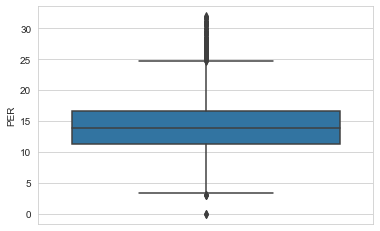

In [6]:
sns.set_style("whitegrid")
sns.boxplot(y=df['PER'])

In [7]:
q1,q3 = 11.31, 16.69
iqr = q3-q1
lower, upper = (q1 - 1.5*(iqr)), (q3 + 1.5*(iqr))
outliers = df[(df['PER']>upper)| (df['PER']<lower)]
outliers.shape

(132, 12)

#### Defining outliers 

In [8]:
clean_df = df[(df['PER']<upper)&(df['PER']>lower)]
clean_df.describe()

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,65.305532,24.246532,0.533630,16.126625,11.006786,17.976049,5.267057,14.600134,9.929768,14.036719,89.505265,2.984556
std,14.165424,7.731527,0.048409,7.947421,2.851157,4.581613,3.831209,5.777683,4.503146,3.893719,118.139004,3.938349
min,17.000000,7.000000,0.338000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,3.310000,-144.600000,-4.800000
25%,56.000000,17.900000,0.503000,10.200000,9.100000,14.700000,2.000000,10.000000,6.200000,11.250000,6.400000,0.200000
50%,68.000000,24.000000,0.534000,14.200000,10.800000,17.600000,4.000000,13.500000,8.800000,13.760000,55.400000,1.800000
75%,77.000000,30.600000,0.564000,20.700000,12.500000,20.900000,8.000000,18.400000,13.100000,16.500000,139.950000,4.700000
max,85.000000,42.500000,0.726000,48.700000,29.600000,36.200000,22.000000,40.000000,26.700000,24.740000,669.300000,22.300000


### Feature selection

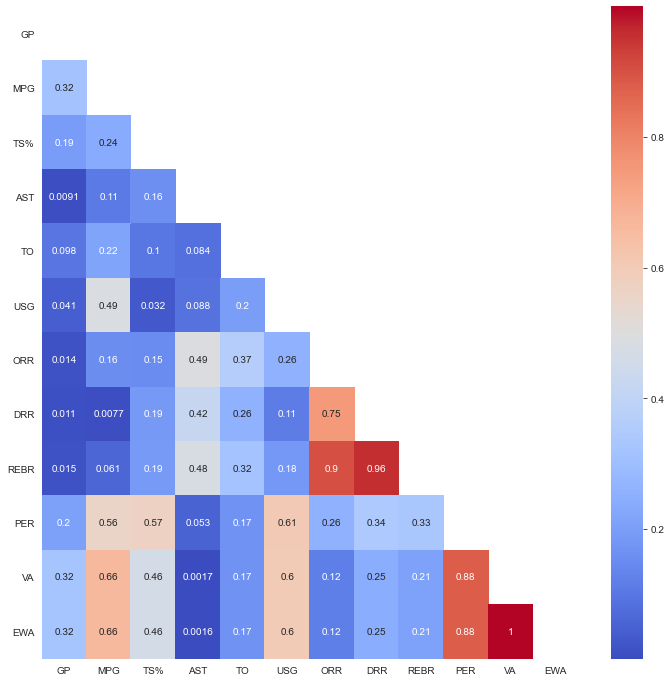

In [9]:
corr = clean_df.corr().abs()
fig_dims = (12,12)
fig, ax = plt.subplots(figsize= fig_dims)
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=np.bool)), ax=ax,cmap='coolwarm',annot=True)
plt.yticks(rotation=0)
plt.show()

In [10]:
for val in [0.3,0.4,0.5,0.6,0.7]:
    poss = abs(clean_df.corr(method='pearson')['PER'][abs(clean_df.corr(method='pearson')['PER']) > val].drop('PER')).index.tolist()
    print(val)
    print(poss)

0.3
['MPG', 'TS%', 'USG', 'DRR', 'REBR', 'VA', 'EWA']
0.4
['MPG', 'TS%', 'USG', 'VA', 'EWA']
0.5
['MPG', 'TS%', 'USG', 'VA', 'EWA']
0.6
['USG', 'VA', 'EWA']
0.7
['VA', 'EWA']


#### We can see that ['MPG', 'TS%', 'USG', 'VA', 'EWA'] all correlate with PER, however we also see the EWA and VA are highly correlated with each other, so we can drop the one that is less accurate

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, explained_variance_score
from sklearn.model_selection import cross_val_score, KFold

In [12]:
features = ['MPG', 'TS%', 'USG', 'VA', 'REBR']
X = clean_df[features]
y = clean_df['PER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score:",r2_score(y_test,y_pred))

RMSE: 1.3160501001514222
R2 score: 0.8836979484673765


In [14]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
adjust_r2= (1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(scores)
print(adjust_r2)

[-1.8961527  -1.72119861 -1.80812418 -1.79742764 -1.64470225]
0.8836592081332614


#### Testing the RMSE accuracy of a Sci-kit learn regression model to use as a base line when comparing with XGBoost.

### XGBoost

In [15]:
import xgboost
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error as MSE

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4786, 5) (1197, 5) (4786,) (1197,)


In [17]:
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train,early_stopping_rounds=25,eval_metric='rmse',eval_set=[(X_test,y_test)],verbose=True)

[0]	validation_0-rmse:9.89940
[1]	validation_0-rmse:6.99714
[2]	validation_0-rmse:4.97112
[3]	validation_0-rmse:3.58457
[4]	validation_0-rmse:2.64386
[5]	validation_0-rmse:2.01652
[6]	validation_0-rmse:1.62987
[7]	validation_0-rmse:1.40016
[8]	validation_0-rmse:1.26683
[9]	validation_0-rmse:1.18866
[10]	validation_0-rmse:1.14601
[11]	validation_0-rmse:1.12188
[12]	validation_0-rmse:1.11004
[13]	validation_0-rmse:1.09804
[14]	validation_0-rmse:1.09312
[15]	validation_0-rmse:1.09273
[16]	validation_0-rmse:1.09381
[17]	validation_0-rmse:1.09186
[18]	validation_0-rmse:1.09253
[19]	validation_0-rmse:1.09143
[20]	validation_0-rmse:1.09390
[21]	validation_0-rmse:1.09446
[22]	validation_0-rmse:1.09364
[23]	validation_0-rmse:1.09367
[24]	validation_0-rmse:1.09350
[25]	validation_0-rmse:1.09501
[26]	validation_0-rmse:1.09666
[27]	validation_0-rmse:1.09664
[28]	validation_0-rmse:1.09984
[29]	validation_0-rmse:1.09875
[30]	validation_0-rmse:1.09928
[31]	validation_0-rmse:1.09837
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgb_y_pred = xgb_model.predict(X_test)
print(np.sqrt(MSE(y_test,xgb_y_pred)))

1.091429156119441


#### XGB regressor RMSE score with the cleaned (outliers removed) dataset, and it is seen that the RMSE score for this model is much more accurate than the Sci-kit learn model.